## Problem Statement

* In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season.
    
##### A look at the data
* Each row in the data contains information on how a player performed in the 2013-2014 NBA season.

Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0

* Here are some selected columns from the data:
- player - name of the player
- pos - the position of the player
- g - number of games the player was in
- gs - number of games the player started
- pts - total points the player scored

There are many more columns in the data, mostly containing information about average player game performance over the course of the season. See this site for an explanation of the rest of them.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import  mean_squared_error ,r2_score
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline

In [2]:
## Reading the inputfile
nba_data=pd.read_csv("nba_2013.csv")

In [3]:
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [4]:
## Displaying the columns
nba_data.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [5]:
nba_data.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [6]:
## Checking for null fields
nba_data.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

* We could see that fields fg. x3p. x2p. efg. ft. has null fields

#### Data Pre-processing

In [7]:
## Updating the Null values of x3p.
nba_data['x3p.'] = nba_data['x3p.'].fillna(nba_data['x3p.'].mean())
nba_data['x3p.'].isnull().sum()

0

In [8]:
## Updating Nan for fg.

In [9]:
nba_data[nba_data['fg.'].isnull()]

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
90,Josh Childress,SF,30,NOP,4,0,24,0,0,NaN,...,3,3,2,1,0,1,1,0,2013-2014,2013
397,Chris Smith,PG,26,NYK,2,0,2,0,0,NaN,...,0,0,0,0,0,0,0,0,2013-2014,2013


In [10]:
nba_data['fg.'] = nba_data['fg.'].fillna(nba_data['fg.'].mean())
nba_data['fg.'].isnull().sum()

0

In [11]:
## Updating Nan for x2p.

In [12]:
nba_data[nba_data['x2p.'].isnull()]

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
54,Keith Bogans,SG,33,BOS,6,0,55,3,6,0.500000,...,3,3,3,1,0,1,2,12,2013-2014,2013
90,Josh Childress,SF,30,NOP,4,0,24,0,0,0.436436,...,3,3,2,1,0,1,1,0,2013-2014,2013
397,Chris Smith,PG,26,NYK,2,0,2,0,0,0.436436,...,0,0,0,0,0,0,0,0,2013-2014,2013


In [13]:
nba_data['x2p.'] = nba_data['x2p.'].fillna(nba_data['x2p.'].mean())
nba_data['x2p.'].isnull().sum()

0

In [14]:
## Updating Nan for efg.

In [15]:
nba_data[nba_data['efg.'].isnull()]

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
90,Josh Childress,SF,30,NOP,4,0,24,0,0,0.436436,...,3,3,2,1,0,1,1,0,2013-2014,2013
397,Chris Smith,PG,26,NYK,2,0,2,0,0,0.436436,...,0,0,0,0,0,0,0,0,2013-2014,2013


In [16]:
nba_data['efg.'] = nba_data['efg.'].fillna(nba_data['efg.'].mean())
nba_data['efg.'].isnull().sum()

0

In [17]:
## Updating Nan for ft.
nba_data['ft.'].dtype

dtype('float64')

In [18]:
nba_data[nba_data['ft.'].isnull()].head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
27,Chris Babb,SG,23,BOS,14,0,132,8,30,0.267000,...,13,17,3,6,0,3,13,22,2013-2014,2013
90,Josh Childress,SF,30,NOP,4,0,24,0,0,0.436436,...,3,3,2,1,0,1,1,0,2013-2014,2013
102,Robert Covington,SF,23,HOU,7,0,34,6,14,0.429000,...,3,5,0,2,0,1,3,16,2013-2014,2013
109,Seth Curry,PG,23,TOT,2,0,13,1,3,0.333000,...,1,1,0,2,0,0,0,3,2013-2014,2013
112,Troy Daniels,SG,22,HOU,5,1,75,15,31,0.484000,...,4,4,5,0,0,3,6,42,2013-2014,2013


In [19]:
nba_data['ft.'] = nba_data['ft.'].fillna(nba_data['ft.'].mean())
nba_data['ft.'].isnull().sum()

0

In [20]:
## Checking for null fields
nba_data.isnull().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

* All the null fields are replaced with mean value of the feature

##### Removing unwanted fields

In [21]:
nba_data.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [22]:
## Checking for String features
list(nba_data.dtypes[nba_data.dtypes == "object"].index)

['player', 'pos', 'bref_team_id', 'season']

* The above features doesn't have any significance in player rating. Removing the dame

In [23]:
nba_data['season_end'].value_counts()

2013    481
Name: season_end, dtype: int64

* The feature season end doesn't have any significance removing the same

In [24]:
## Creating the list of features to be removed from the dataset
features_to_remove = ['player', 'pos', 'bref_team_id', 'season','season_end']

In [25]:
nba_dataset=nba_data.drop(features_to_remove,axis=1)

#### Identifiying dependent and independent features
* Independent feature ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.','x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb','ast', 'stl', 'blk', 'tov', 'pf']
* Dependent Features ['pts']

##### Splitting Dependent and Independent features

In [26]:
X = nba_dataset.drop('pts', axis=1).values
y = nba_dataset['pts'].values
X.shape, y.shape

((481, 25), (481,))

##### Train test Split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((384, 25), (97, 25), (384,), (97,))

In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##### Optimizing the n_neighbors value

In [30]:
for k_val in range(1,20):
    kn=KNeighborsRegressor(n_neighbors=k_val)
    kn.fit(X_train,y_train)
    y_pred=kn.predict(X_test)
    print("RMSE is ",np.sqrt(mean_squared_error(y_pred,y_test))," for K-Value:",k_val)

RMSE is  120.40310301854701  for K-Value: 1
RMSE is  93.26334513833262  for K-Value: 2
RMSE is  89.55749687366884  for K-Value: 3
RMSE is  75.72814491977002  for K-Value: 4
RMSE is  76.51317520127787  for K-Value: 5
RMSE is  81.15212758851143  for K-Value: 6
RMSE is  80.9555441352602  for K-Value: 7
RMSE is  80.61415454906039  for K-Value: 8
RMSE is  84.21327404281077  for K-Value: 9
RMSE is  85.96219320023084  for K-Value: 10
RMSE is  86.3477748962331  for K-Value: 11
RMSE is  89.27598198471763  for K-Value: 12
RMSE is  92.24815784345446  for K-Value: 13
RMSE is  94.93759120305205  for K-Value: 14
RMSE is  92.4645961162271  for K-Value: 15
RMSE is  92.89304685494413  for K-Value: 16
RMSE is  94.18655092225166  for K-Value: 17
RMSE is  96.20439295254502  for K-Value: 18
RMSE is  98.22886447084993  for K-Value: 19


* We have the smallest RMSE for 4
* We will continue with K value as 4

##### KNeighborsRegressor for K=4

In [34]:
k_val=4
kn=KNeighborsRegressor(n_neighbors=k_val)
kn.fit(X_train,y_train)
y_pred=kn.predict(X_test)
print("Error Rate of the Regression Model rf : ",mean_squared_error(y_pred,y_test))
print("R2 Score of the Regression Model rf : ",r2_score(y_pred,y_test))

Error Rate of the Regression Model rf :  5734.75193298969
R2 Score of the Regression Model rf :  0.9645521703768133


Text(0.5,1,'Actual vs Predicted points')

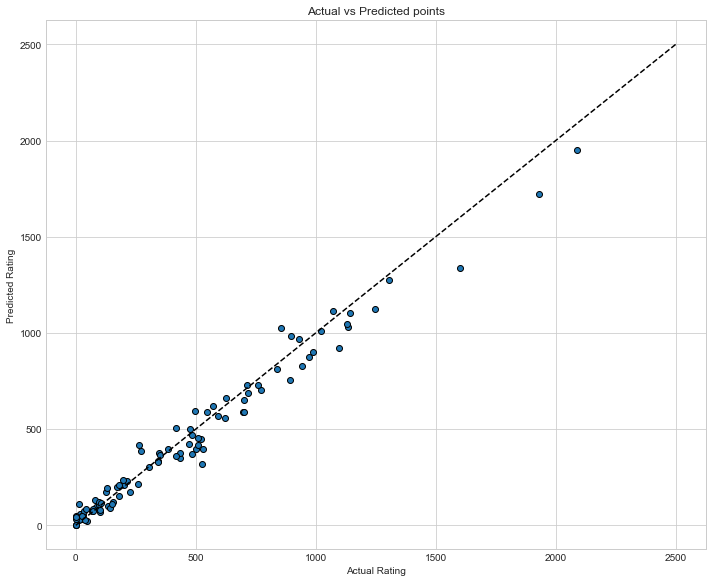

In [35]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred,edgecolors=(0,0,0))
plt.plot([0, 2500], [0, 2500], '--k')
plt.axis('tight')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.tight_layout()
plt.title("Actual vs Predicted points")

#### K-Fold Cross Validation

In [36]:
from sklearn.cross_validation import KFold
from collections import defaultdict
kfold = KFold(len(X),n_folds=8,shuffle=True,random_state=0)
kn=KNeighborsRegressor(n_neighbors=4)
names = nba_dataset.drop('pts',axis=1).columns
fold_accuracy = []
scores_kfold =  defaultdict(list)
for train_fold, valid_fold in kfold:
    train = X[train_fold] # Extract train data with cv indices
    valid = X[valid_fold] # Extract valid data with cv indices
    
    train_y = y[train_fold]
    valid_y = y[valid_fold]
    
    model = kn.fit(train,train_y)
    y_pred = kn.predict(valid)
    #valid_acc = model.score(X = valid, y = valid_y)
    valid_acc=r2_score(y_pred,valid_y)
    fold_accuracy.append(valid_acc) 
    

print("R2 Score per fold: ", fold_accuracy, "\n")
print("Average R2 Score: ", sum(fold_accuracy)/len(fold_accuracy))

R2 Score per fold:  [0.9674970305337034, 0.9695551030376476, 0.9781249191396864, 0.9564630332588435, 0.9763980847920047, 0.9665026008166533, 0.9775605695684093, 0.973885157039281] 

Average R2 Score:  0.9707483122732786


#### Conclusion

* The designed model have an average R2 score of 0.9710058232374262